
## Problem
---


Anda adalah seorang Data Analyst yang akan mengerjakan sebuah project untuk menyelesaikan permasalahan seorang client. Client Anda membutuhkan hasil analisa data yang menggunakan statistik dan dashboard visualisasi untuk membantu mereka menyelesaikan masalahnya.

---
## Objectives
---


*Pengerjaan* ini dibuat dengan tujuan sebagai berikut :

- Bagaimana tren penjualan bulanan ?.

- Bagaimana penjualan bedasarkan product category?.

- bagaimana penjualan berdasarkan age category?.

- bagaimana penjualan berdasarkan lokasi?.

- bagaimana statistik deskriptif berdasarkan penjualan

- bagaimana korelasi antara session duration minutes, page view dan quantity?.
---


## Data Processing
---


In [52]:
# Package
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [53]:
# Load Data
df = pd.read_csv('Pengerjaan.csv')
df.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4


In [54]:
# Sumaary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  5000 non-null   object 
 1   Customer_ID               5000 non-null   object 
 2   Date                      5000 non-null   object 
 3   Age                       5000 non-null   int64  
 4   Gender                    5000 non-null   object 
 5   City                      5000 non-null   object 
 6   Product_Category          5000 non-null   object 
 7   Unit_Price                5000 non-null   float64
 8   Quantity                  5000 non-null   int64  
 9   Discount_Amount           5000 non-null   float64
 10  Total_Amount              5000 non-null   float64
 11  Payment_Method            5000 non-null   object 
 12  Device_Type               5000 non-null   object 
 13  Session_Duration_Minutes  5000 non-null   int64  
 14  Pages_Vi

Dataset memiliki:
- 5000 rows
- 18 kolom
- 670 kb memory

dari dataset masih memiliki inconsisten datatype pada date. selanjutnya akan dilakukan handling datatype

In [55]:
# handling Datatype
df['Date'] = pd.to_datetime(df['Date'],yearfirst=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Order_ID                  5000 non-null   object        
 1   Customer_ID               5000 non-null   object        
 2   Date                      5000 non-null   datetime64[ns]
 3   Age                       5000 non-null   int64         
 4   Gender                    5000 non-null   object        
 5   City                      5000 non-null   object        
 6   Product_Category          5000 non-null   object        
 7   Unit_Price                5000 non-null   float64       
 8   Quantity                  5000 non-null   int64         
 9   Discount_Amount           5000 non-null   float64       
 10  Total_Amount              5000 non-null   float64       
 11  Payment_Method            5000 non-null   object        
 12  Device_Type         

dataset:
- datatype Date telah berubah 
- tidak memiliki missing value

dari dataset telah dilakukan perubahan pada datatype, sekarang akan dilakukan checking duplicated

In [56]:
# Checking Duplicated
df.duplicated().sum()

0

dataset tidak memiliki data duplicated. selanjurnya checking missing value

In [57]:
pd.set_option('display.max_colwidth', None)

cols = list(df.columns)

listItem = []
for col in cols:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,Order_ID,5000,"[ORD_001337, ORD_004885, ORD_004507, ORD_000645, ORD_000690, ORD_000223, ORD_002506, ORD_004540, ORD_001808, ORD_003413, ORD_004457, ORD_004797, ORD_001211, ORD_000514, ORD_003462, ORD_001418, ORD_000198, ORD_000374, ORD_003204, ORD_004204, ORD_000751, ORD_002466, ORD_003920, ORD_000038, ORD_003721, ORD_002069, ORD_002080, ORD_000285, ORD_000846, ORD_003744, ORD_003991, ORD_003301, ORD_004873, ORD_002003, ORD_003730, ORD_001602, ORD_000477, ORD_002957, ORD_001565, ORD_000527, ORD_004551, ORD_004850, ORD_000450, ORD_003803, ORD_004585, ORD_003246, ORD_004291, ORD_004550, ORD_004883, ORD_000182, ORD_004113, ORD_004744, ORD_001054, ORD_003313, ORD_003948, ORD_000991, ORD_004801, ORD_001144, ORD_004740, ORD_004656, ORD_003748, ORD_003622, ORD_001373, ORD_004676, ORD_001127, ORD_003274, ORD_001822, ORD_000359, ORD_001477, ORD_001690, ORD_003755, ORD_003743, ORD_004501, ORD_002535, ORD_003836, ORD_003039, ORD_002497, ORD_003749, ORD_004673, ORD_001072, ORD_003669, ORD_001829, ORD_003491, ORD_003083, ORD_000227, ORD_002321, ORD_002468, ORD_002102, ORD_000912, ORD_001284, ORD_000839, ORD_002117, ORD_002525, ORD_000279, ORD_001784, ORD_000928, ORD_001597, ORD_003464, ORD_004168, ORD_002937, ...]"
1,Customer_ID,5000,"[CUST_01337, CUST_04885, CUST_04507, CUST_00645, CUST_00690, CUST_00223, CUST_02506, CUST_04540, CUST_01808, CUST_03413, CUST_04457, CUST_04797, CUST_01211, CUST_00514, CUST_03462, CUST_01418, CUST_00198, CUST_00374, CUST_03204, CUST_04204, CUST_00751, CUST_02466, CUST_03920, CUST_00038, CUST_03721, CUST_02069, CUST_02080, CUST_00285, CUST_00846, CUST_03744, CUST_03991, CUST_03301, CUST_04873, CUST_02003, CUST_03730, CUST_01602, CUST_00477, CUST_02957, CUST_01565, CUST_00527, CUST_04551, CUST_04850, CUST_00450, CUST_03803, CUST_04585, CUST_03246, CUST_04291, CUST_04550, CUST_04883, CUST_00182, CUST_04113, CUST_04744, CUST_01054, CUST_03313, CUST_03948, CUST_00991, CUST_04801, CUST_01144, CUST_04740, CUST_04656, CUST_03748, CUST_03622, CUST_01373, CUST_04676, CUST_01127, CUST_03274, CUST_01822, CUST_00359, CUST_01477, CUST_01690, CUST_03755, CUST_03743, CUST_04501, CUST_02535, CUST_03836, CUST_03039, CUST_02497, CUST_03749, CUST_04673, CUST_01072, CUST_03669, CUST_01829, CUST_03491, CUST_03083, CUST_00227, CUST_02321, CUST_02468, CUST_02102, CUST_00912, CUST_01284, CUST_00839, CUST_02117, CUST_02525, CUST_00279, CUST_01784, CUST_00928, CUST_01597, CUST_03464, CUST_04168, CUST_02937, ...]"
2,Date,451,"[2023-01-01 00:00:00, 2023-01-02 00:00:00, 2023-01-03 00:00:00, 2023-01-04 00:00:00, 2023-01-05 00:00:00, 2023-01-06 00:00:00, 2023-01-07 00:00:00, 2023-01-08 00:00:00, 2023-01-09 00:00:00, 2023-01-10 00:00:00, 2023-01-11 00:00:00, 2023-01-12 00:00:00, 2023-01-13 00:00:00, 2023-01-14 00:00:00, 2023-01-15 00:00:00, 2023-01-16 00:00:00, 2023-01-17 00:00:00, 2023-01-18 00:00:00, 2023-01-19 00:00:00, 2023-01-20 00:00:00, 2023-01-21 00:00:00, 2023-01-22 00:00:00, 2023-01-23 00:00:00, 2023-01-24 00:00:00, 2023-01-25 00:00:00, 2023-01-26 00:00:00, 2023-01-27 00:00:00, 2023-01-28 00:00:00, 2023-01-29 00:00:00, 2023-01-30 00:00:00, 2023-01-31 00:00:00, 2023-02-01 00:00:00, 2023-02-02 00:00:00, 2023-02-03 00:00:00, 2023-02-04 00:00:00, 2023-02-05 00:00:00, 2023-02-06 00:00:00, 2023-02-07 00:00:00, 2023-02-08 00:00:00, 2023-02-09 00:00:00, 2023-02-10 00:00:00, 2023-02-11 00:00:00, 2023-02-12 00:00:00, 2023-02-13 00:00:00, 2023-02-14 00:00:00, 2023-02-15 00:00:00, 2023-02-16 00:00:00, 2023-02-17 00:00:00, 2023-02-18 00:00:00, 2023-02-19 00:00:00, 2023-02-20 00:00:00, 2023-02-21 00:00:00, 2023-02-22 00:00:00, 2023-02-23 00:00:00, 2023-02-24 00:00:00, 2023-02-25 00:00:00, 2023-02-26 00:00:00, 2023-02-27 00:00:00, 2023-02-28 00:00:00, 2023-03-01 00:00:00, 2023-03-02 00:00:00, 2023-03-03 00:00:00, 2023-03-04 00:00:00, 2023-03-05 00:00:00, 2023-03-06 00:00:00, 2023-03-07 00:00:00, 2023-03-08 00:00:00, 2023-03-09 00:00:00, 2023-03-10 00:00:00, 2023-03-11 00:00:00, 2023-03-12 00:00:00, 

dari semua telah melakukan:
- Handling datatype
- Check duplicated
- Check missing value

dataset bersih tidak ada value aneh. telah bisa lanjut ketahap selanjutnya



## Exploration Data Analysis
---


### Trend Penjualan Bulanan

In [58]:
df["Periode_Bulan"] = df["Date"].dt.to_period("M").astype(str)
Trend_Bulanan = df.groupby("Periode_Bulan").agg({
    "Total_Amount": "sum",
    "Order_ID":"count"
}).reset_index()
Trend_Bulanan.rename(columns={
    'Order_ID':"Jumlah_Transaksi",
    'Total_Amount':'Jumlah_Penjualan'
    },inplace=True) 
Trend_Bulanan


,Periode_Bulan,Jumlah_Penjualan,Jumlah_Transaksi
0,2023-01,286694.32,301
1,2023-02,338784.92,334
2,2023-03,321716.01,344
3,2023-04,257332.58,281
4,2023-05,351902.03,355
5,2023-06,324356.96,349
6,2023-07,346618.03,342
7,2023-08,391505.89,371
8,2023-09,262602.86,306
9,2023-10,352286.61,361


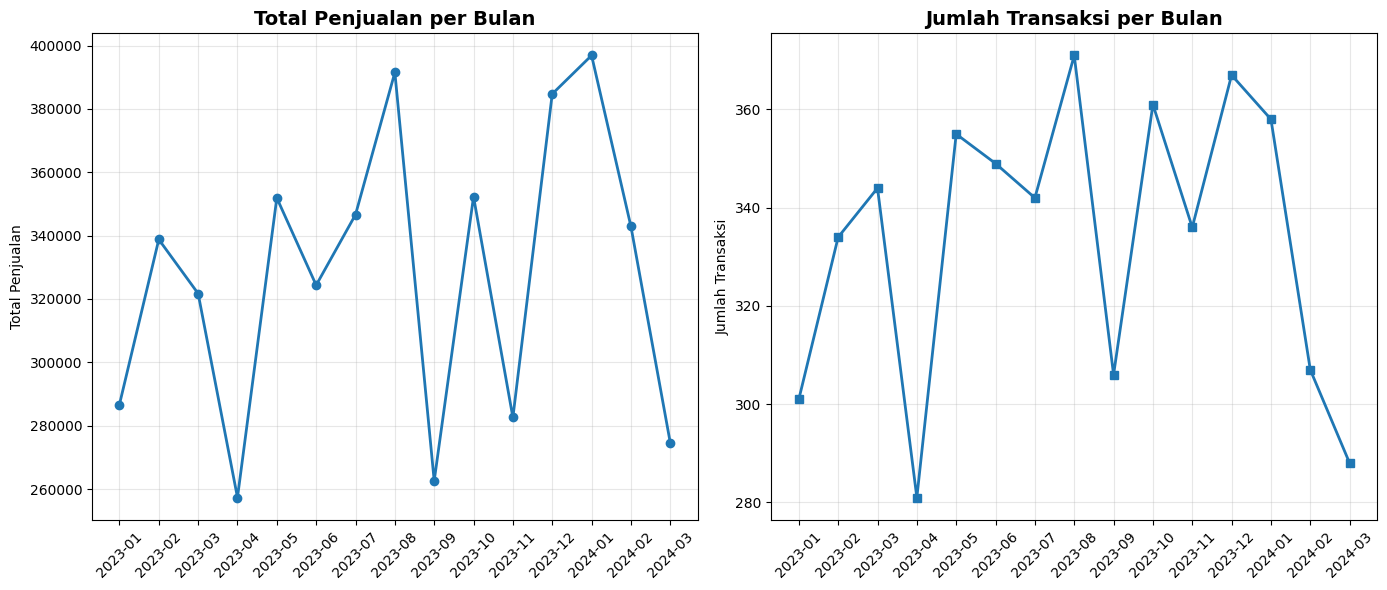


=== STATISTIK PENJUALAN BULANAN ===
Total Penjualan: 4,915,545
Rata-rata per Bulan: 327,703
Penjualan Tertinggi: 396,875
Penjualan Terendah: 257,333


In [59]:
plt.figure(figsize=(14, 6))

# Plot total penjualan
plt.subplot(1, 2, 1)
plt.plot(Trend_Bulanan['Periode_Bulan'], 
         Trend_Bulanan['Jumlah_Penjualan'], 
         marker='o', linewidth=2)
plt.title('Total Penjualan per Bulan', fontsize=14, fontweight='bold')
plt.ylabel('Total Penjualan')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Plot jumlah transaksi
plt.subplot(1, 2, 2)
plt.plot(Trend_Bulanan['Periode_Bulan'], 
         Trend_Bulanan['Jumlah_Transaksi'], 
         marker='s', linewidth=2)
plt.title('Jumlah Transaksi per Bulan', fontsize=14, fontweight='bold')
plt.ylabel('Jumlah Transaksi')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
print("\n=== STATISTIK PENJUALAN BULANAN ===")
print(f"Total Penjualan: {Trend_Bulanan['Jumlah_Penjualan'].sum():,.0f}")
print(f"Rata-rata per Bulan: {Trend_Bulanan['Jumlah_Penjualan'].mean():,.0f}")
print(f"Penjualan Tertinggi: {Trend_Bulanan['Jumlah_Penjualan'].max():,.0f}")
print(f"Penjualan Terendah: {Trend_Bulanan['Jumlah_Penjualan'].min():,.0f}")

dari tren bulana:
- Ada tren musiman kuat: peningkatan di Agustus, Desember, dan awal tahun (Januari).
- Pergerakan total penjualan sangat mirip dengan quantity, artinya harga produk relatif stabil.
- Kinerja 2024 awal lebih kuat daripada tahun 2023.

### Penjualan berdasarkan Product Category

In [60]:
product = df.groupby("Product_Category").agg({
    "Total_Amount": "sum",
    "Order_ID":"count"
}).reset_index()
product.rename(columns={
    'Order_ID':"Jumlah_Transaksi",
    'Total_Amount':'Jumlah_Penjualan'
    },inplace=True) 
product

,Product_Category,Jumlah_Penjualan,Jumlah_Transaksi
0,Beauty,156584.74,621
1,Books,72744.52,616
2,Electronics,2328806.81,624
3,Fashion,375214.93,622
4,Food,96138.67,619
5,Home & Garden,908348.86,621
6,Sports,754563.56,667
7,Toys,223142.48,610


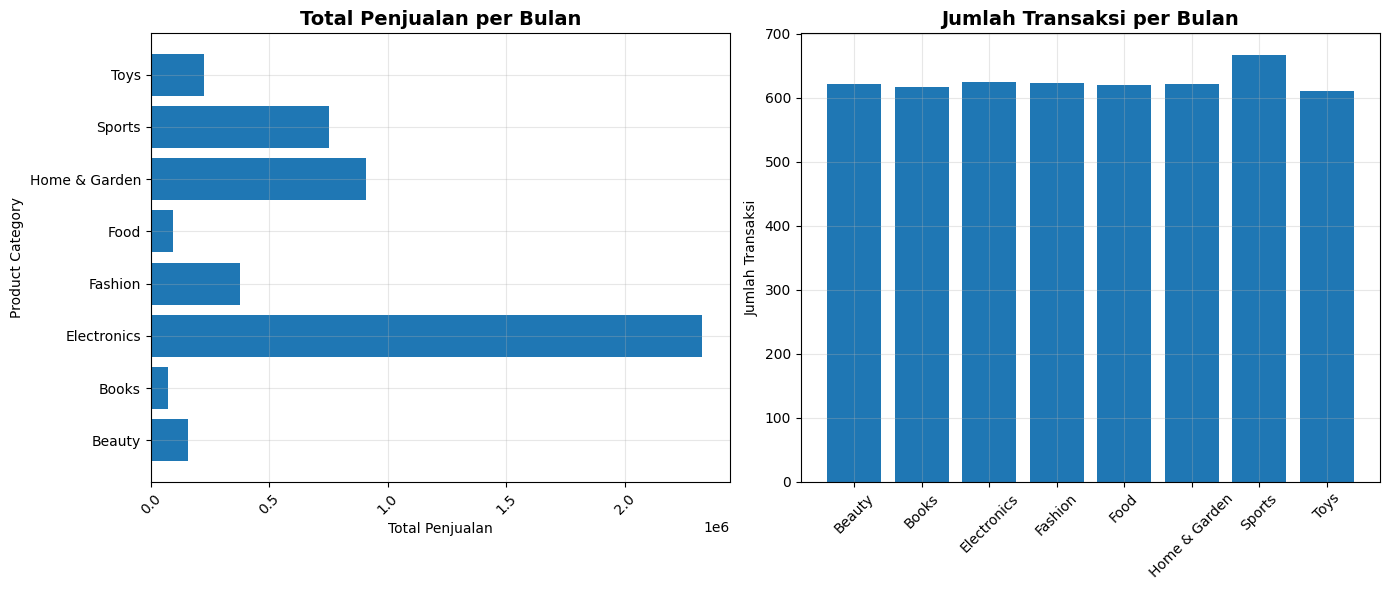

In [61]:
plt.figure(figsize=(14, 6))

# Plot total penjualan
plt.subplot(1, 2, 1)
plt.barh(product['Product_Category'], 
         product['Jumlah_Penjualan']
         )
plt.title('Total Penjualan per Bulan', fontsize=14, fontweight='bold')
plt.ylabel('Product Category')
plt.xlabel('Total Penjualan')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Plot jumlah transaksi
plt.subplot(1, 2, 2)
plt.bar(product['Product_Category'], 
         product['Jumlah_Transaksi']
         )
plt.title('Jumlah Transaksi per Bulan', fontsize=14, fontweight='bold')
plt.ylabel('Jumlah Transaksi')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

dari category product:
- lectronics adalah kategori paling profitable, sebagian besar karena harga satuannya jauh lebih tinggi.
- Sports punya kuantitas terjual tertinggi, tapi tidak mengalahkan revenue Electronics.
- Books dan Food memiliki harga dan revenue paling rendah, meskipun jumlah unitnya tidak jauh dari kategori lain.
- Penjualan kuantitas antar kategori relatif stabil, menunjukkan tidak ada kategori yang "tidak laku", tetapi nilai transaksinya sangat berbeda karena harga.

### Penjualan Berdasarkan Category Age

In [62]:
df['Category_Age'] = (
    df['Age']
        .apply(lambda x: 'Remaja' if x <= 20 else 'Dewasa' if x <= 40 else 'Tua')
)
Category_Costumer = df.groupby("Category_Age").agg({
    "Total_Amount": "sum",
    "Order_ID":"count"
}).round().reset_index()
Category_Costumer

,Category_Age,Total_Amount,Order_ID
0,Dewasa,2726802.0,2856
1,Remaja,619412.0,595
2,Tua,1569331.0,1549


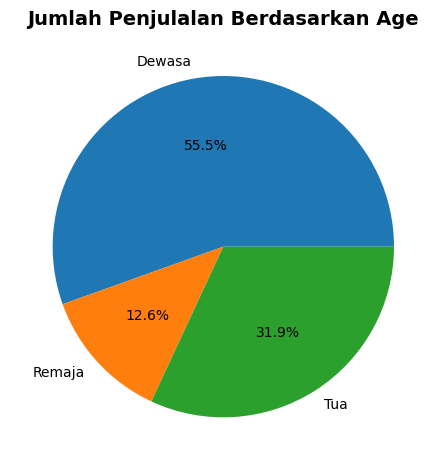

In [63]:
plt.pie(Category_Costumer['Total_Amount'], labels=Category_Costumer['Category_Age'], autopct='%1.1f%%')
plt.title('Jumlah Penjulalan Berdasarkan Age', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


dari profit berdasarkan Category Age:
-  category dewasa memiliki profit dan jumlah order terbesar dengan 2726802.0 TRY dan 2856 order
-  disusul category tua dengan 1569331.0 TRY dan 1549
-  remaja profit dan jumlah order terkecil dengan 619412.0 TRY dan 595

### Penjualan Berdasarkan Lokasi

In [64]:
lokasi = df.groupby("City").agg({
    "Total_Amount": "sum",
    "Order_ID":"count"
}).round().reset_index().sort_values(by='Total_Amount')
lokasi

,City,Total_Amount,Order_ID
4,Eskisehir,178978.0,210
8,Kayseri,312304.0,257
2,Antalya,315550.0,374
5,Gaziantep,318408.0,349
9,Konya,344975.0,317
0,Adana,427060.0,378
3,Bursa,459076.0,496
7,Izmir,567535.0,600
1,Ankara,657536.0,735
6,Istanbul,1334123.0,1284


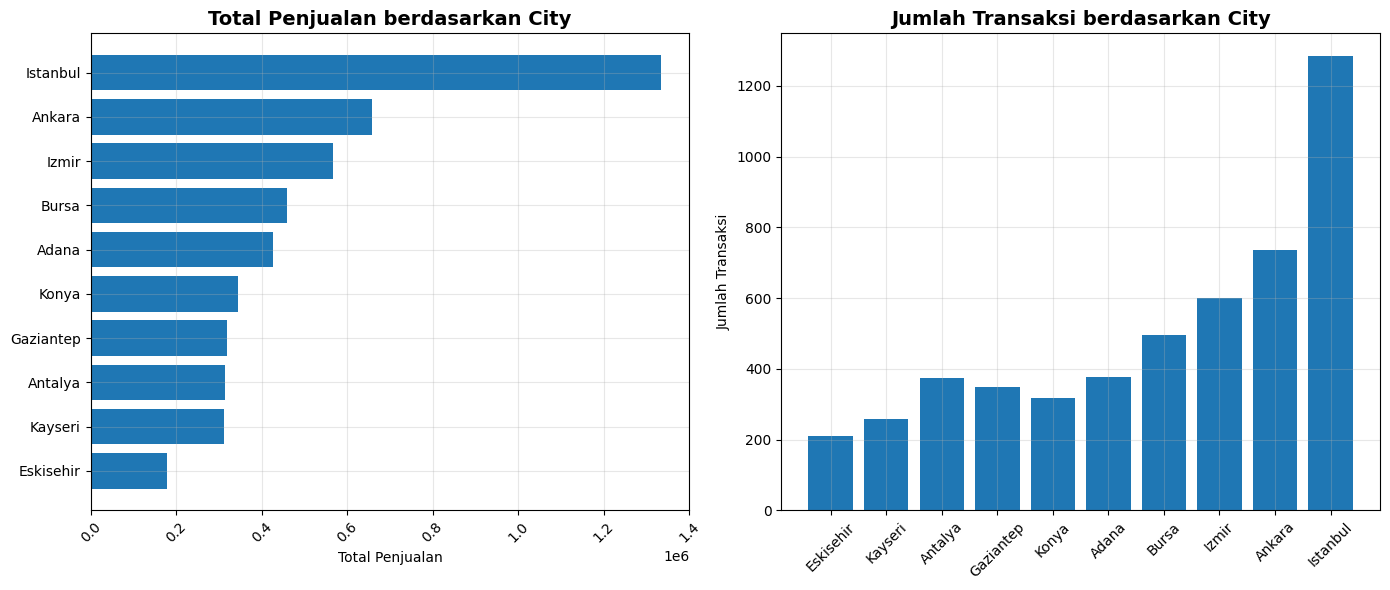

In [65]:
plt.figure(figsize=(14, 6))

# Plot total penjualan
plt.subplot(1, 2, 1)
plt.barh(lokasi['City'], 
         lokasi['Total_Amount']
         )
plt.title('Total Penjualan berdasarkan City', fontsize=14, fontweight='bold')
plt.xlabel('Total Penjualan')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Plot jumlah transaksi
plt.subplot(1, 2, 2)
plt.bar(lokasi['City'], 
         lokasi['Order_ID']
         )
plt.title('Jumlah Transaksi berdasarkan City', fontsize=14, fontweight='bold')
plt.ylabel('Jumlah Transaksi')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

dari profi berdasarkan lokasi:
-  istanbul memiliki profit dan jumlah order terbesar dengan 1334123.0 TRY dan 1284 order
-  Eskisehir profit dan jumlah order terkecil dengan 178978.0 TRY dan 210

### Statistik Deskriptif Penjualan

In [66]:
i = df['Total_Amount'].describe().round()
pd.DataFrame(i)

,Total_Amount
count,5000.0
mean,983.0
std,1899.0
min,8.0
25%,123.0
50%,338.0
75%,980.0
max,22024.0


dari Deskriptif :
- memiliki 5000 order
- dengan penjualan terendah 8 TRY, penjulan tertinggi 22024 TRY
- nilai tengah penjualan 338 TRY
- dan rata2 983 TRY

kesimpulan dari deskriptif:
- Banyak transaksi bernilai kecil/menengah, namun sedikit transaksi bernilai sangat besar yang menarik rata-rata menjadi tinggi.

### Kolerasi Session_Duration_Minutes vs Quantity dan Pages_Viewed vs Quantity

In [67]:
corr_r_duration_view, pval_p_duration_view = stats.pearsonr(df['Session_Duration_Minutes'], df['Quantity'])
corr_r_page_view, pval_p_page_view = stats.pearsonr(df['Pages_Viewed'], df['Quantity'])

print(f"r-correlation: {corr_r_duration_view:.3f}, p-value: {pval_p_duration_view:.3f}")
print(f"r-correlation: {corr_r_page_view:.3f}, p-value: {pval_p_page_view:.3f}")

pd.DataFrame({
    'Index':['r-correlation','p-value'],
    'Duration_View':[corr_r_page_view,corr_r_duration_view],
    'Page_View':[pval_p_page_view,pval_p_duration_view] 
})

r-correlation: -0.006, p-value: 0.652
r-correlation: -0.004, p-value: 0.755


,Index,Duration_View,Page_View
0,r-correlation,-0.004417,0.754822
1,p-value,-0.006383,0.651835


Gambar tersebut menunjukkan Anda sedang melakukan uji korelasi Pearson (stats.pearsonr) antara dua variabel numerik:
- Session_Duration_Minutes vs Quantity
- Pages_Viewed vs Quantity

Kesimpulan:
- Durasi session tidak memiliki hubungan dengan jumlah pembelian. Tidak ada bukti statistik bahwa semakin lama session, semakin banyak (atau sedikit) Quantity.
- Jumlah halaman yang dilihat tidak berpengaruh terhadap Quantity. Tidak ada hubungan antara keduanya

# Kesimpulan

Exploration Data Analysis:
- Trend Penjualan Bulanan
- Penjualan Berdasarkan Product Category, Age Category dan Lokasi
- Statistik Deskriptif Penjualan
- Korelasi Session_Duration_Minutes vs Quantity dan Pages_Viewed vs Quantity

Dapat disimpulkan bahwa Kota Istanbul dan product category electrinik menjadi tingkat penjualan tertinggi . 

In [68]:
# Lokasi Istanbul
df_istanbul = df[df['City']=='Istanbul']
penjualan_per_bulan = df_istanbul.groupby('Periode_Bulan').agg({
    'Total_Amount': 'sum'
}).reset_index()
penjualan_per_bulan


,Periode_Bulan,Total_Amount
0,2023-01,84666.80
1,2023-02,111183.51
2,2023-03,69358.78
3,2023-04,55680.46
4,2023-05,87352.40
5,2023-06,107713.01
6,2023-07,86653.44
7,2023-08,95642.44
8,2023-09,63411.25
9,2023-10,107494.82


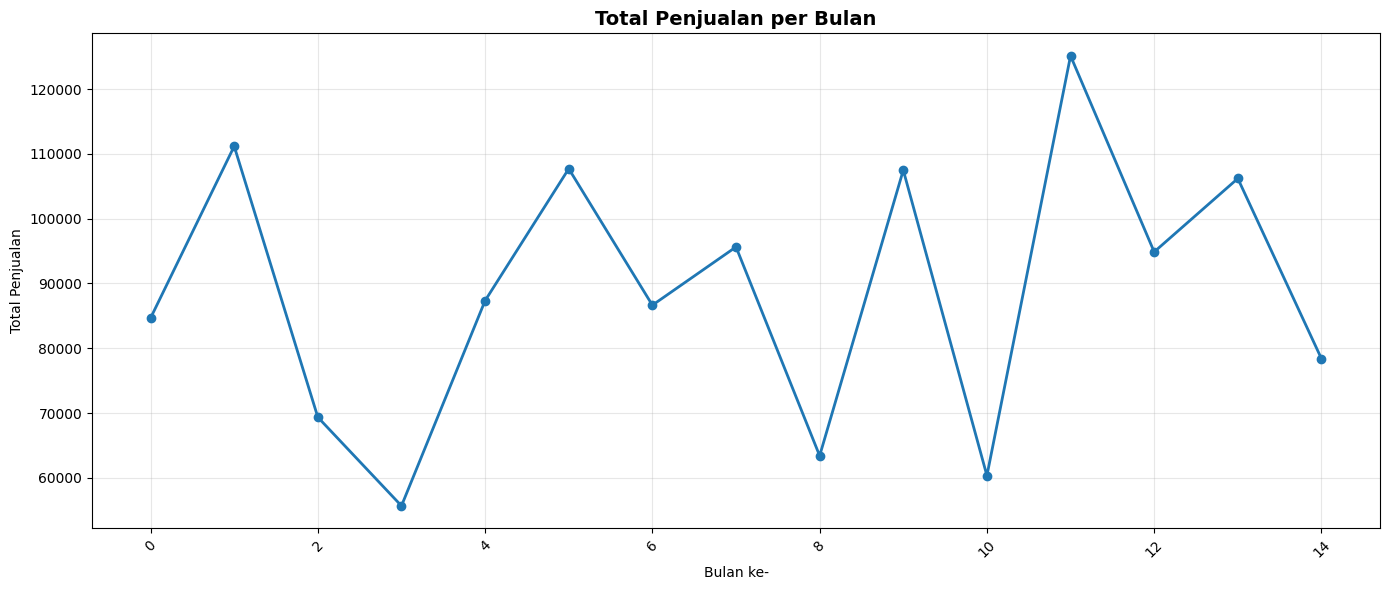


=== STATISTIK PENJUALAN Bulanan ===
Total Penjualan: 1334122.56
Rata-rata per Bulan: 88942.0
Bulan Tertinggi: 125137.49
Bulan Terendah: 55680.0


In [69]:
plt.figure(figsize=(14, 6))

# Plot total penjualan

plt.plot(range(len(penjualan_per_bulan)), 
         penjualan_per_bulan['Total_Amount'], 
         marker='o', linewidth=2)
plt.title('Total Penjualan per Bulan', fontsize=14, fontweight='bold')
plt.xlabel('Bulan ke-')
plt.ylabel('Total Penjualan')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
print("\n=== STATISTIK PENJUALAN Bulanan ===")
print(f"Total Penjualan: {penjualan_per_bulan['Total_Amount'].sum()}")
print(f"Rata-rata per Bulan: {penjualan_per_bulan['Total_Amount'].mean().round()}")
print(f"Bulan Tertinggi: {penjualan_per_bulan['Total_Amount'].max()}")
print(f"Bulan Terendah: {penjualan_per_bulan['Total_Amount'].min().round()}")

In [70]:
df_electonik = df[df['Product_Category']=='Electronics']
hasil = df_electonik.groupby('Periode_Bulan').agg({
    "Quantity": "sum"}).reset_index()
hasil.to_csv('Forecasting.csv',index=False)
hasil

,Periode_Bulan,Quantity
0,2023-01,89
1,2023-02,87
2,2023-03,95
3,2023-04,62
4,2023-05,91
5,2023-06,103
6,2023-07,118
7,2023-08,122
8,2023-09,69
9,2023-10,112


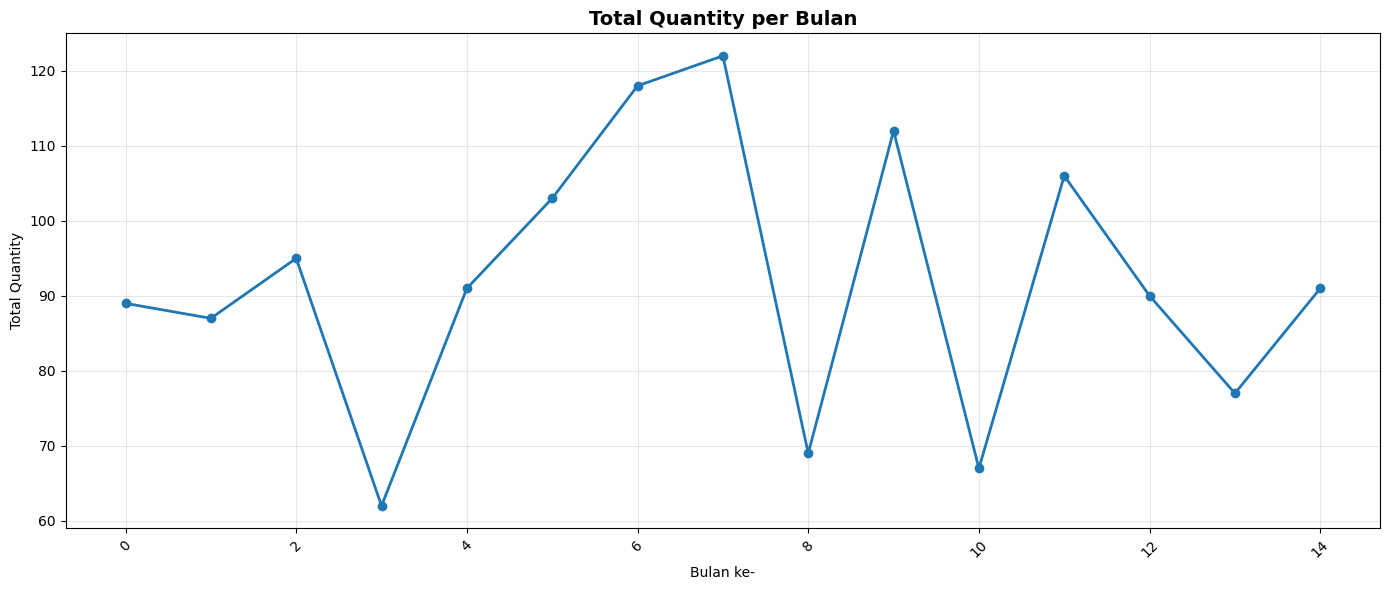


=== STATISTIK QUANTITY Bulanan ===
Total Quantity: 1379
Rata-rata per Bulan: 92.0
Bulan Tertinggi: 122
Bulan Terendah: 62


In [71]:
plt.figure(figsize=(14, 6))

# Plot total quantity elektronik

plt.plot(range(len(hasil)), 
         hasil['Quantity'], 
         marker='o', linewidth=2)
plt.title('Total Quantity per Bulan', fontsize=14, fontweight='bold')
plt.xlabel('Bulan ke-')
plt.ylabel('Total Quantity')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
print("\n=== STATISTIK QUANTITY Bulanan ===")
print(f"Total Quantity: {hasil['Quantity'].sum()}")
print(f"Rata-rata per Bulan: {hasil['Quantity'].mean().round()}")
print(f"Bulan Tertinggi: {hasil['Quantity'].max()}")
print(f"Bulan Terendah: {hasil['Quantity'].min()}")

Dalam industri e-commerce, memahami dinamika penjualan setiap bulan sangatlah penting untuk menyusun strategi bisnis yang tepat. Karena itu, proses forecasting diperlukan untuk memprediksi tren penjualan di masa mendatang, sehingga perusahaan dapat merencanakan stok dengan lebih tepat, menyusun strategi pemasaran yang efektif, dan mengambil keputusan berbasis data.

Untuk mendapatkan hasil prediksi yang lebih andal dan akurat, analisis forecasting idealnya didukung oleh data historis yang cukup panjang **setidaknya dua tahun**, Semakin panjang data historis, biasanya makin baik.